In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error 


In [2]:
insurance= pd.read_csv('insurance.csv')

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.groupby(['sex'])['smoker'].sum()

sex
female    yesnonononoyesnonononoyesnonononononononononon...
male      nononononononoyesnononoyesnononoyesyesnoyesnon...
Name: smoker, dtype: object

In [6]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
def map_smoking(insurance):
    mapped=[]
    
    
    for row in insurance:
        
        if row == 'yes':
            mapped.append(1)
        else:
            mapped.append(0)
            
            
    return mapped
insurance['smoker_norm']=map_smoking(insurance['smoker'])

In [8]:
nonum_insurance=[insurance for col in insurance.select_dtypes(include=["object"])]

In [9]:
nonum_insurance

[      age     sex     bmi  children smoker     region      charges  \
 0      19  female  27.900         0    yes  southwest  16884.92400   
 1      18    male  33.770         1     no  southeast   1725.55230   
 2      28    male  33.000         3     no  southeast   4449.46200   
 3      33    male  22.705         0     no  northwest  21984.47061   
 4      32    male  28.880         0     no  northwest   3866.85520   
 ...   ...     ...     ...       ...    ...        ...          ...   
 1333   50    male  30.970         3     no  northwest  10600.54830   
 1334   18  female  31.920         0     no  northeast   2205.98080   
 1335   18  female  36.850         0     no  southeast   1629.83350   
 1336   21  female  25.800         0     no  southwest   2007.94500   
 1337   61  female  29.070         0    yes  northwest  29141.36030   
 
       smoker_norm  
 0               1  
 1               0  
 2               0  
 3               0  
 4               0  
 ...           ...  

In [10]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [11]:
def map_obese(insurance):
    mapped=[]
    
    
    for row in insurance:
        
        if row == 'yes':
            mapped.append(1)
        else:
            mapped.append(0)
            
            
    return mapped
insurance['obese_norm']=map_smoking(insurance['bmi'])

In [12]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


Text(0.5, 1.0, 'first startup')

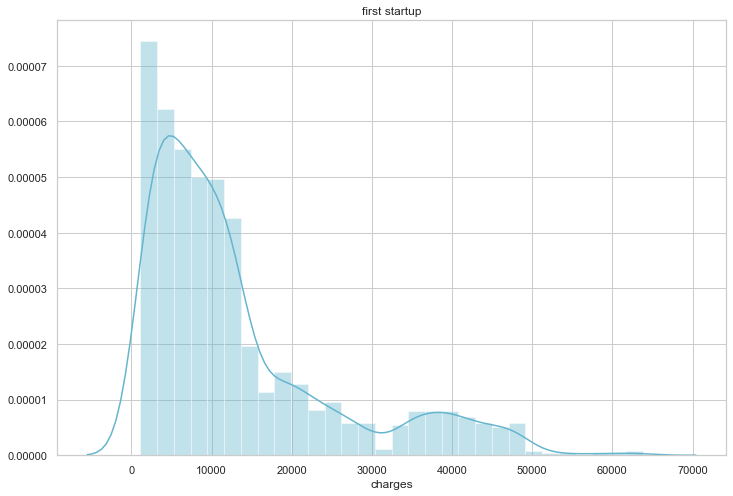

In [13]:
import seaborn as sns
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1, figsize= (12,8))
ax= sns.distplot(insurance['charges'], kde=True , color = 'c')
plt.title('first startup')

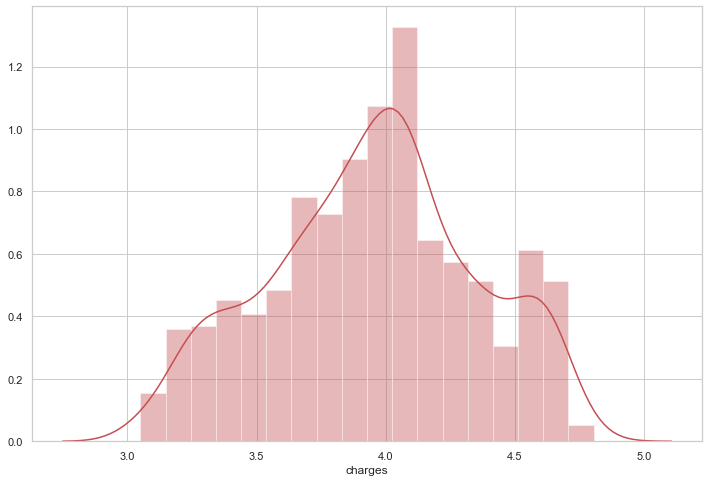

In [14]:
f,ax = plt.subplots(1,1, figsize= (12,8))
ax= sns.distplot(np.log10(insurance['charges']), kde=True , color = 'r')

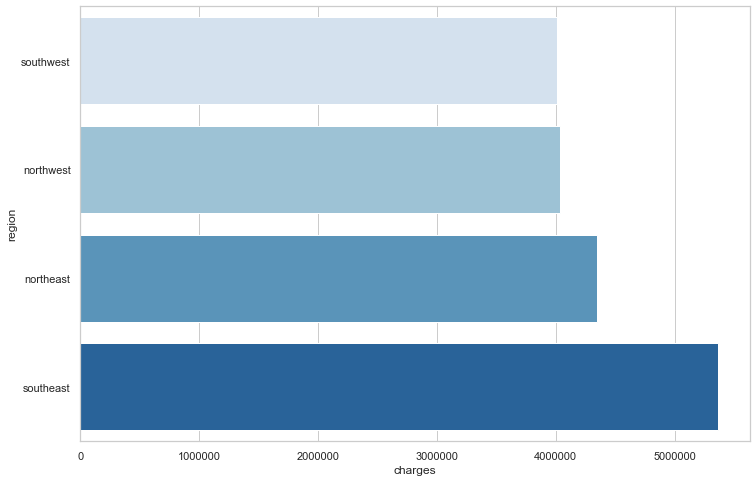

In [15]:
charges = insurance['charges'].groupby(insurance.region).sum().sort_values(ascending=True)
f,ax = plt.subplots(1,1, figsize= (12,8))
ax = sns.barplot(charges.head(),charges.head().index, palette = 'Blues')

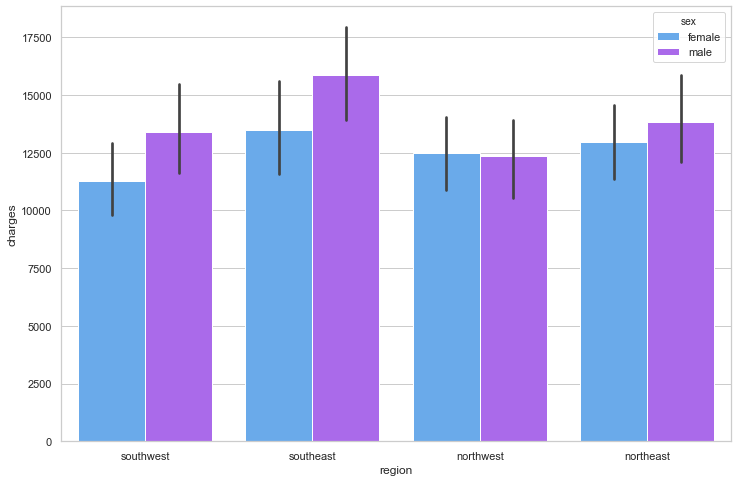

In [16]:
f,ax = plt.subplots(1,1, figsize= (12,8))
ax = sns.barplot(x='region', y='charges', hue= 'sex', data=insurance, palette = 'cool')

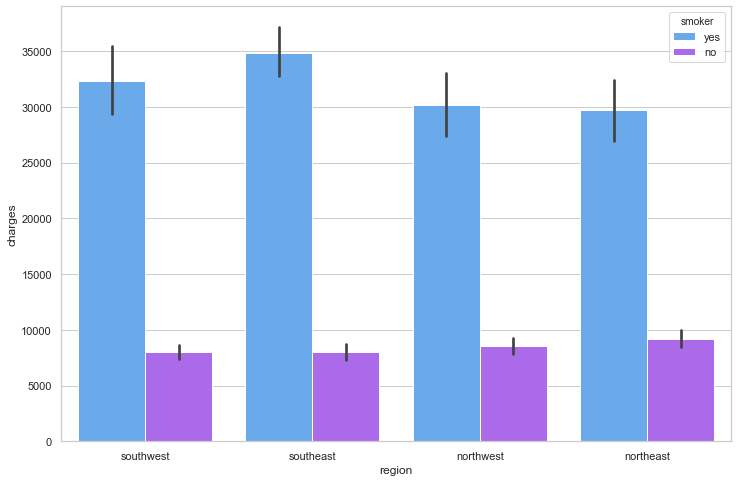

In [17]:
f,ax = plt.subplots(1,1, figsize= (12,8))
ax = sns.barplot(x='region', y='charges', hue= 'smoker', data=insurance, palette = 'cool')

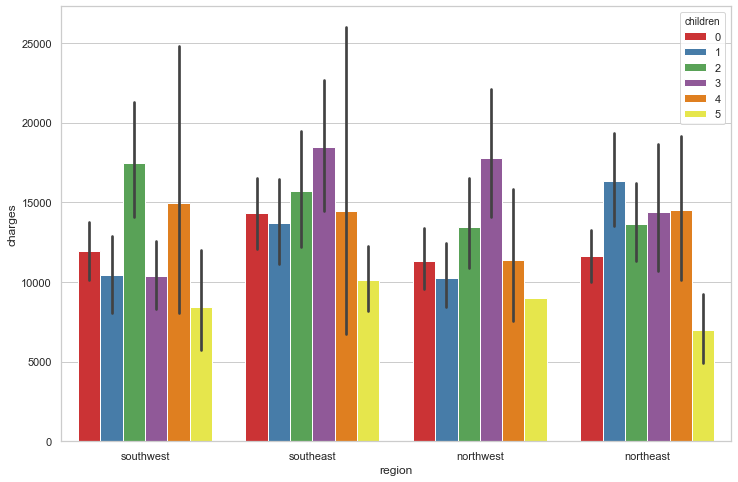

In [18]:
f,ax = plt.subplots(1,1, figsize= (12,8))
ax = sns.barplot(x='region', y='charges', hue= 'children', data=insurance, palette = 'Set1')

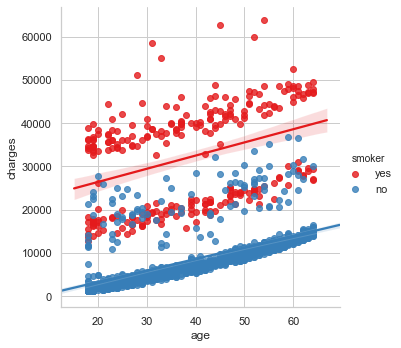

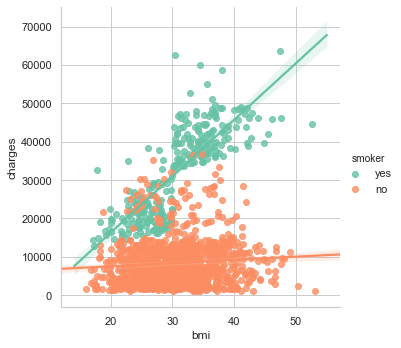

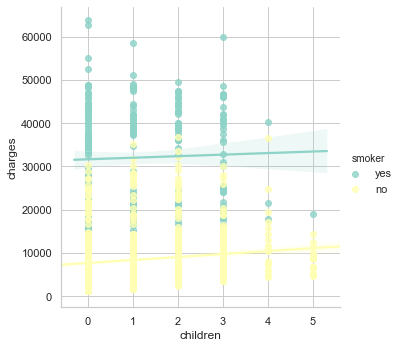

In [19]:
ax = sns.lmplot(x='age', y='charges', hue= 'smoker', data=insurance, palette = 'Set1')
ax = sns.lmplot(x='bmi', y='charges', hue= 'smoker', data=insurance, palette = 'Set2')
ax = sns.lmplot(x='children', y='charges', hue= 'smoker', data=insurance, palette = 'Set3')

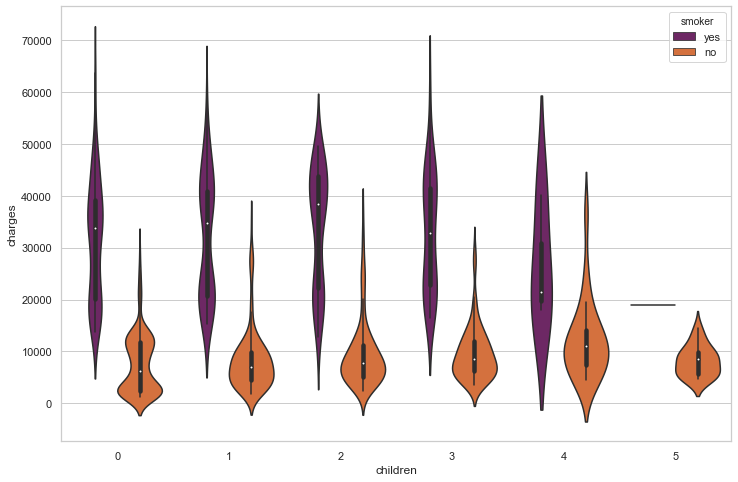

In [20]:
f,ax = plt.subplots(1,1, figsize= (12,8))
ax = sns.violinplot(x='children', y='charges', data=insurance, orient='v', hue= 'smoker', palette = 'inferno') 

In [21]:
insurance[['sex', 'smoker', 'region']] = insurance[['sex', 'region', 'smoker']].astype('category')
insurance.dtypes


age               int64
sex            category
bmi             float64
children          int64
smoker         category
region         category
charges         float64
smoker_norm       int64
obese_norm        int64
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(insurance.sex.drop_duplicates())
insurance.sex = label.transform(insurance.sex)
label.fit(insurance.smoker.drop_duplicates())
insurance.smoker = label.transform(insurance.smoker)
label.fit(insurance.region.drop_duplicates())
insurance.region = label.transform(insurance.region)
insurance.dtypes

age              int64
sex              int32
bmi            float64
children         int64
smoker           int32
region           int32
charges        float64
smoker_norm      int64
obese_norm       int64
dtype: object

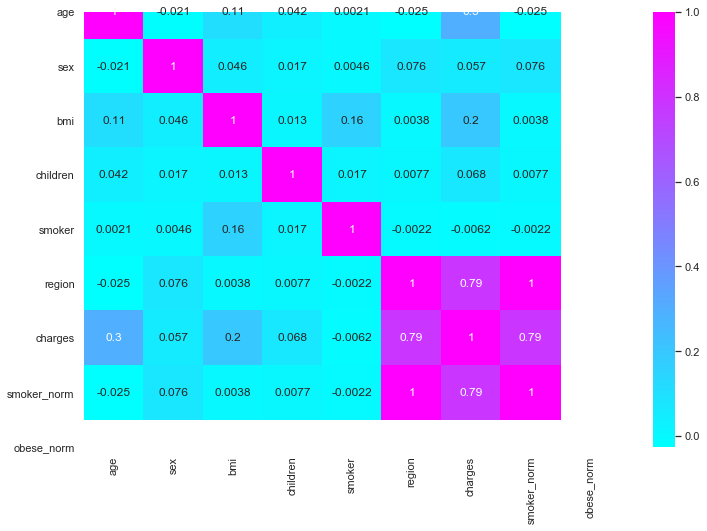

In [23]:
f,ax = plt.subplots(1,1, figsize= (12,8))
ax=sns.heatmap(insurance.corr(), annot=True, cmap='cool')

In [24]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
x=insurance.drop(['charges'], axis=1)
y=insurance['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824406
[  253.99185244   -24.32455098   328.40261701   443.72929547
  -288.50857254 11784.43974191 11784.43974191     0.        ]
0.7998747145449959


In [26]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11652.63797117193
[  253.94309583   -22.8874407    328.36754944   443.91050891
  -288.70666816 11767.44112067 11767.44112067     0.        ]
0.7997873336758305


In [28]:
from sklearn.preprocessing import PolynominalFeatures 
x=insurance.drop(['charges', 'sex', 'region'], axis =1)
y=insurance.charges
pol=PolynominalFeatures (degree=2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test =  holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg= LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))
from sklearn.preprocessing import PolynomialFeatures


ImportError: cannot import name 'PolynominalFeatures' from 'sklearn.preprocessing' (C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [30]:
from sklearn.preprocessing import PolynomialFeatures


In [31]:
x=insurance.drop(['charges', 'sex', 'region'], axis =1)
y=insurance.charges
pol=PolynomialFeatures (degree=2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test =  holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg= LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-6101.273181753697
[ 5.90548866e-10 -4.81010833e+01  5.73166743e+02  9.61195056e+02
  1.44628586e+02 -9.55024232e+03  1.09298526e-09  3.04654402e+00
  1.31980825e+00  3.31065047e+00  1.61523307e+01  3.68989196e+00
  1.06183506e-10 -8.60377168e+00  1.33858762e+01 -4.61400338e+01
  1.39808500e+03 -1.09139364e-11 -1.20313879e+02 -2.16820943e+02
 -4.66389361e+02  0.00000000e+00  1.26708668e+02  2.80534612e+02
  0.00000000e+00 -9.55024232e+03  0.00000000e+00  0.00000000e+00]
0.8823014989594772
